In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_frame=pd.read_csv("heart1.csv")

In [3]:
data_frame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data_frame.duplicated().any()

True

In [5]:
data_frame=data_frame.drop_duplicates()

In [6]:
data_frame.duplicated().any()

False

In [7]:
data_frame.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

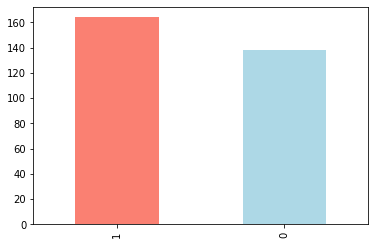

In [8]:
data_frame.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [9]:
#separating categorical data
categorical_val=[]
continuous_val=[]
for column in data_frame.columns:
    if len(data_frame[column].unique())<=10:
        categorical_val.append(column)
    else:
        continuous_val.append(column)

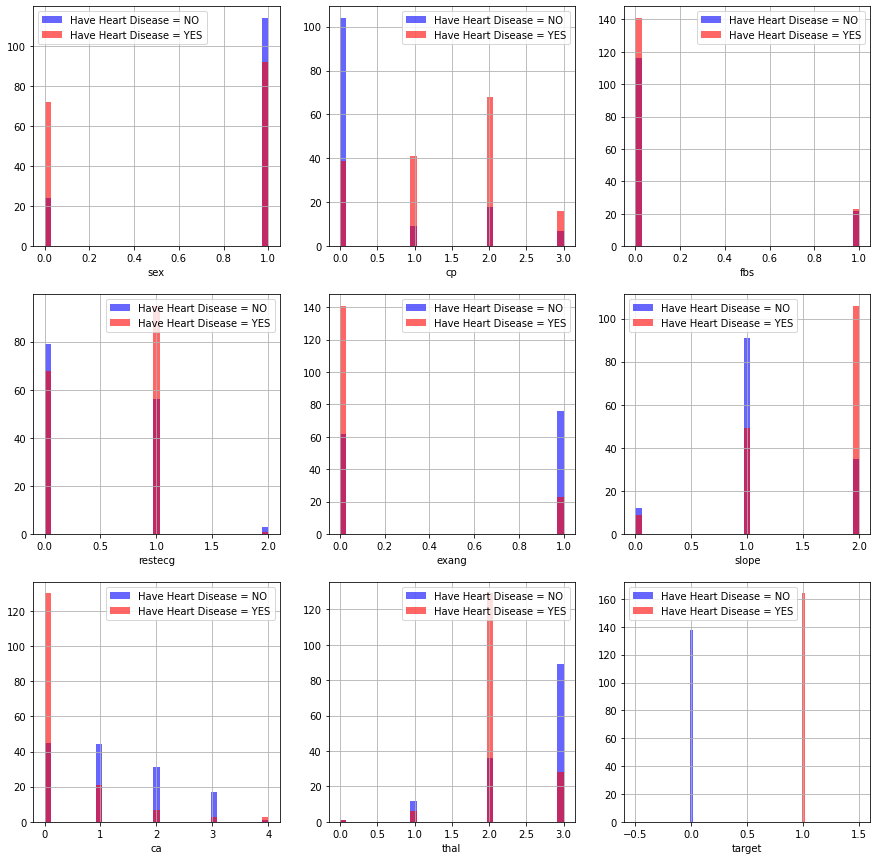

In [10]:
plt.figure(figsize=(15,15))
for i, column in enumerate(categorical_val,1):
    plt.subplot(3,3,i)
    data_frame[data_frame["target"]==0][column].hist(bins=35,color='blue',label='Have Heart Disease = NO', alpha=0.6)
    data_frame[data_frame["target"]==1][column].hist(bins=35,color='red',label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

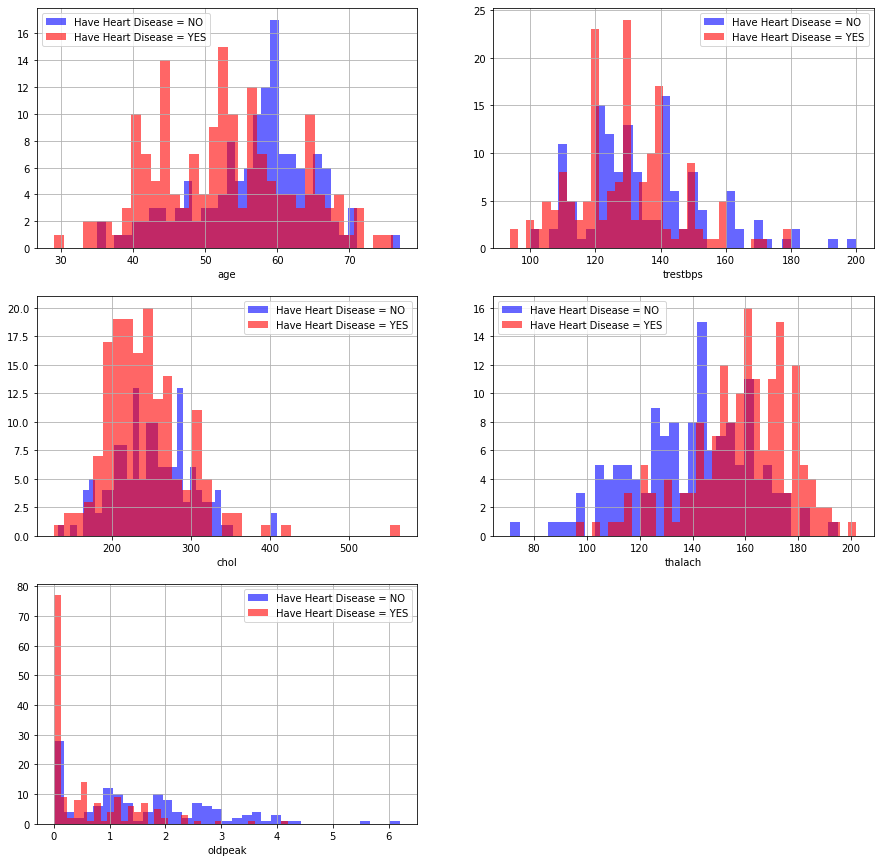

In [11]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continuous_val, 1):
    plt.subplot(3, 2, i)
    data_frame[data_frame["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data_frame[data_frame["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)


In [12]:
data_frame.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


In [13]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
continuous_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [15]:
data_frame['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [16]:
#encoding categorical data
categorical_val.remove('sex')
categorical_val.remove('target')
data_frame=pd.get_dummies(data_frame,columns=categorical_val,drop_first=True)
data_frame.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [17]:
#scaling continuous data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_frame[continuous_val]=sc.fit_transform(data_frame[continuous_val])
data_frame.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [18]:

X=data_frame.drop('target',axis=1).values
y=data_frame['target'].values
print(X)
print(y)

[[-0.26796589  1.         -0.37655636 ...  0.          0.
   1.        ]
 [-0.15726042  1.          0.47891019 ...  0.          0.
   1.        ]
 [ 1.72473259  1.          0.76406571 ...  0.          0.
   1.        ]
 ...
 [-0.26796589  1.         -0.20546305 ...  0.          0.
   1.        ]
 [ 0.50697241  1.          1.61953226 ...  0.          1.
   0.        ]
 [-0.04655495  1.         -0.66171188 ...  0.          0.
   1.        ]]
[0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 

In [19]:
#splitting training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [20]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[30 18]
 [ 6 37]]


0.7362637362637363

In [22]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[36 12]
 [ 4 39]]


0.8241758241758241

In [24]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[38 10]
 [ 6 37]]


0.8241758241758241

In [26]:
#Random Forest Training on Training Set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=0)

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[36 12]
 [ 6 37]]


0.8021978021978022

In [28]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[39  9]
 [ 5 38]]


0.8461538461538461

In [30]:
data_frame.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [31]:
newdata=pd.DataFrame({
    'age':63,
    'sex':1,
    'trestbps':145,
    'chol':302,
    'thalach':168,
    'oldpeak':3.5,
    'cp1':0,
    'cp2':0,
    'cp3':1,
    'fbs1':0,
    'restecg_1':0,
    'restecg_2':1,
    'exang_1':0,
    'slope_1':0,
    'slope_2':1,
    'ca_1':1,
    'ca_2':0,
    'ca_3':0,
    'ca_4':1,
    'thal_1':0,
    'thal_2':1,
    'thal_3':0
    
    
},index=[0])

In [32]:
newdata

,age,sex,trestbps,chol,thalach,oldpeak,cp1,cp2,cp3,fbs1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,1,145,302,168,3.5,0,0,1,0,...,0,0,1,1,0,0,1,0,1,0


In [33]:
newdata[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]=sc.fit_transform(newdata[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [34]:
newdata.values

array([[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        0., 0., 1., 0., 1., 0.]])

In [35]:
if classifier.predict(newdata.values)==[1]:
    print("You have heart disease")
else:
    print("You don't have heart disease")

You have heart disease


In [39]:
newdata=pd.DataFrame({
    'age':52,
    'sex':0,
    'trestbps':125,
    'chol':212,
    'thalach':155,
    'oldpeak':1,
    'cp1':1,
    'cp2':0,
    'cp3':0,
    'fbs1':0,
    'restecg_1':0,
    'restecg_2':1,
    'exang_1':1,
    'slope_1':1,
    'slope_2':0,
    'ca_1':0,
    'ca_2':0,
    'ca_3':1,
    'ca_4':0,
    'thal_1':1,
    'thal_2':0,
    'thal_3':0
    
    
},index=[0])

In [40]:
newdata[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]=sc.fit_transform(newdata[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

In [41]:
if classifier.predict(newdata.values)==[1]:
    print("You have heart disease")
else:
    print("You don't have heart disease")

You don't have heart disease
